# Data Scientist Salaries - Data Processing and analysis  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import LabelEncoder

## Data Preparation

In [3]:
df = pd.read_csv('ds_salaries.csv')
print(df.shape)
print('\n')
df.info()

(3755, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
print(df.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [21]:
# Extract categorical variables
cat_vars = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

# Create LabelEncoder object
encoder = LabelEncoder()

# Encode categorical variables as integers
for var in cat_vars:
    df[var] = encoder.fit_transform(df[var])

In [22]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,EUR,85847,26,100,25,0
1,2023,2,0,66,30000,USD,30000,75,100,70,2
2,2023,2,0,66,25500,USD,25500,75,100,70,2
3,2023,3,2,47,175000,USD,175000,11,100,12,1
4,2023,3,2,47,120000,USD,120000,11,100,12,1


In [23]:
df.drop(['salary','salary_currency'] , axis='columns', inplace = True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,85847,26,100,25,0
1,2023,2,0,66,30000,75,100,70,2
2,2023,2,0,66,25500,75,100,70,2
3,2023,3,2,47,175000,11,100,12,1
4,2023,3,2,47,120000,11,100,12,1


<Axes: ylabel='Density'>

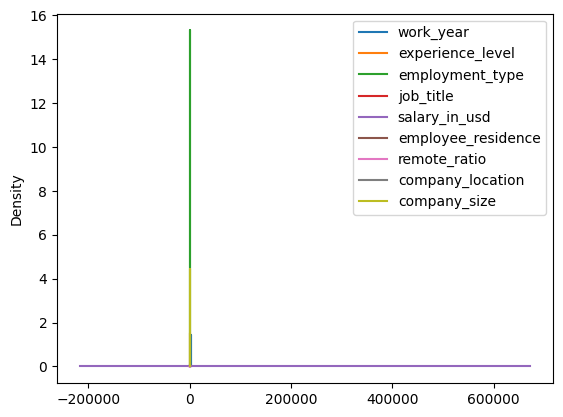

In [24]:
df.plot.kde()

In [44]:
df_scaled = skl.preprocessing.StandardScaler().fit_transform(df)

In [45]:
df2 = pd.DataFrame(df_scaled, columns = df.columns)
df2.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0.905994,0.585736,0.025927,2.392234,-0.820391,-2.087565,1.105918,-2.121818,-2.343022
1,0.905994,-0.517846,-14.951717,1.421058,-1.706187,0.460186,1.105918,0.450625,2.758774
2,0.905994,-0.517846,-14.951717,1.421058,-1.777563,0.460186,1.105918,0.450625,2.758774
3,0.905994,0.585736,0.025927,0.395928,0.593676,-2.867488,1.105918,-2.864968,0.207876
4,0.905994,0.585736,0.025927,0.395928,-0.278686,-2.867488,1.105918,-2.864968,0.207876


<Axes: ylabel='Density'>

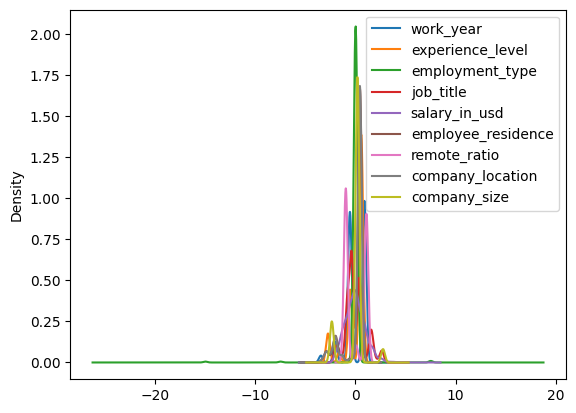

In [46]:
df2.plot.kde()

## Data Transformation

## Feature Selection

## Regression - Salary Prediction